# **Práctica 7: Fusion de datos**

Nombre:

No. Cuenta:

Email:

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer una fusión de datos a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [3]:
#!pip install yfinance
#!pip install googlefinance

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [2]:
# Para Amazon
DataAmazon = yf.Ticker('AMZN')

In [4]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = '2022-10-1', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000,0,0.0
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000,0,0.0
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000,0,0.0
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000,0,0.0
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000,0,0.0
...,...,...,...,...,...,...,...
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002,62723300,0,0.0
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004,60094700,0,0.0
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002,55763800,0,0.0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
AmazonHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 945 entries, 2019-01-02 00:00:00-05:00 to 2022-09-30 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          945 non-null    float64
 1   High          945 non-null    float64
 2   Low           945 non-null    float64
 3   Close         945 non-null    float64
 4   Volume        945 non-null    int64  
 5   Dividends     945 non-null    int64  
 6   Stock Splits  945 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 59.1 KB


In [6]:
AmazonHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,945.000000,945.000000,945.000000,945.000000,9.450000e+02,945.0,945.000000
mean,131.288485,132.848069,129.605474,131.234781,7.997098e+07,0.0,0.021164
std,33.499832,33.854856,33.016316,33.377611,3.472010e+07,0.0,0.650600
min,73.260002,76.900002,73.046501,75.014000,1.762600e+07,0.0,0.000000
25%,94.652496,95.526497,93.772499,94.598503,5.644000e+07,0.0,0.000000
50%,138.050003,140.250000,135.901993,137.940994,7.029000e+07,0.0,0.000000
75%,162.117996,163.999496,160.123001,161.880997,9.415600e+07,0.0,0.000000
max,187.199997,188.654007,184.839493,186.570496,3.113460e+08,0.0,20.000000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los valores a fusionar**

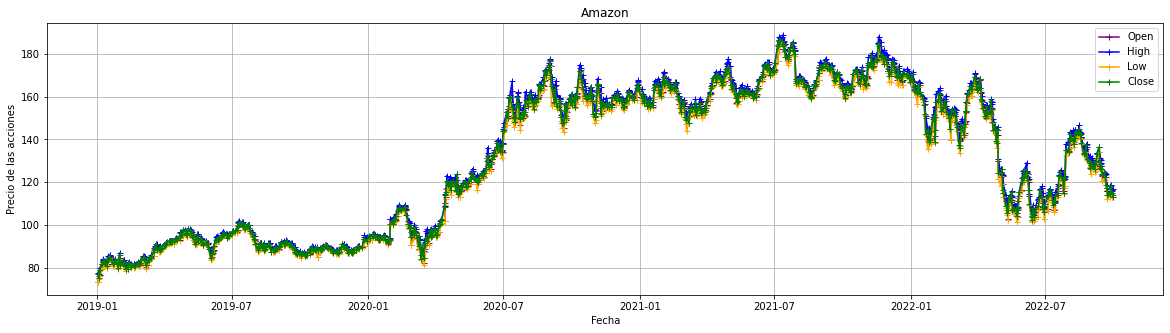

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='purple', marker='+', label='Open')
plt.plot(AmazonHist['High'], color='blue', marker='+', label='High')
plt.plot(AmazonHist['Low'], color='orange', marker='+', label='Low')
plt.plot(AmazonHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

### Fusion de datos de modo tradicional

In [8]:
Fusion = AmazonHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
Fusion

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002
...,...,...,...,...
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002


In [17]:
# En caso de tener valores nulos
Fusion = Fusion.dropna()
Fusion

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002
...,...,...,...,...
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002


In [18]:
#Promedio
PromedioSimple = Fusion.loc[: , 'Open':'Close'] #Una alternativa Fusion.loc[: , 0:3] .loc[:,] dos puntos indica todos los registros
Fusion['Media'] = PromedioSimple.mean(axis=1)
Fusion

,Open,High,Low,Close,Media
Date,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,75.232750
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,75.692501
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,77.721249
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,80.694626
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,82.681124
...,...,...,...,...,...
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002,114.730000
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004,115.745001
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002,116.222500


In [19]:
#Mediana
Mediana = Fusion.loc[: , 'Open':'Close']
Fusion['Mediana'] = Mediana.median(axis=1)
Fusion

,Open,High,Low,Close,Media,Mediana
Date,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,75.232750,75.108250
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,75.692501,75.507252
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,77.721249,77.634750
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,80.694626,80.795502
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,82.681124,83.031750
...,...,...,...,...,...,...
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002,114.730000,114.225002
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004,115.745001,115.805000
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002,116.222500,116.195000


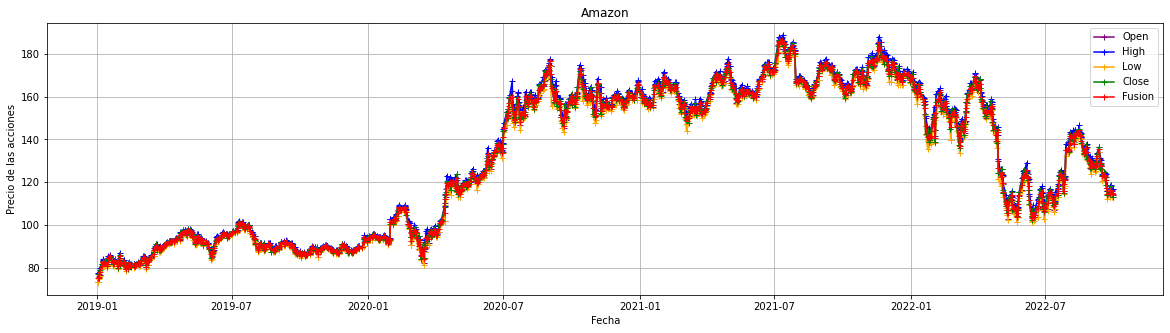

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(Fusion['Open'], color='purple', marker='+', label='Open')
plt.plot(Fusion['High'], color='blue', marker='+', label='High')
plt.plot(Fusion['Low'], color='orange', marker='+', label='Low')
plt.plot(Fusion['Close'], color='green', marker='+', label='Close')
plt.plot(Fusion['Media'], color='red', marker='+', label='Fusion')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

### Fusion de datos mediante algoritmos de ML

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, max_error, r2_score 

In [22]:
X_train = np.array(Fusion[['Open', 'High', 'Low']])
pd.DataFrame(X_train)

,0,1,2
0,73.260002,77.667999,73.046501
1,76.000504,76.900002,74.855499
2,76.500000,79.699997,75.915497
3,80.115501,81.727997,79.459503
4,83.234497,83.830498,80.830498
...,...,...,...
940,113.300003,117.339996,113.129997
941,117.199997,118.320000,113.050003
942,114.379997,118.699997,113.800003
943,115.599998,116.070000,113.059998


In [23]:
Y_train = np.array(Fusion[['Close']])
pd.DataFrame(Y_train)

,0
0,76.956497
1,75.014000
2,78.769501
3,81.475502
4,82.829002
...,...
940,115.150002
941,114.410004
942,118.010002
943,114.800003


Para el modelo lineal, la variable y tomaría los datos que ayuden mejor a seleccionar los datos. Ejemplo: en el caso de sensores elegir los mejores datos para la variable y del modelo lineal.

In [24]:
FusionLineal = linear_model.LinearRegression()
FusionLineal.fit(X_train, Y_train) 

LinearRegression()

In [25]:
#Se genera la estimación
Y_estimacion = FusionLineal.predict(X_train)
pd.DataFrame(Y_estimacion)

,0
0,76.868391
1,75.910984
2,78.791233
3,81.010498
4,81.868930
...,...
940,116.571201
941,114.820653
942,117.555816
943,113.968593


In [26]:
Fusion['FusionLineal'] = Y_estimacion
Fusion

,Open,High,Low,Close,Media,Mediana,FusionLineal
Date,,,,,,,
2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,75.232750,75.108250,76.868391
2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,75.692501,75.507252,75.910984
2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,77.721249,77.634750,78.791233
2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,80.694626,80.795502,81.010498
2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,82.681124,83.031750,81.868930
...,...,...,...,...,...,...,...
2022-09-26 00:00:00-04:00,113.300003,117.339996,113.129997,115.150002,114.730000,114.225002,116.571201
2022-09-27 00:00:00-04:00,117.199997,118.320000,113.050003,114.410004,115.745001,115.805000,114.820653
2022-09-28 00:00:00-04:00,114.379997,118.699997,113.800003,118.010002,116.222500,116.195000,117.555816


In [27]:
print('Coeficientes: \n', FusionLineal.coef_)
print('Intercepto: \n', FusionLineal.intercept_)
print("Residuo: %.4f" % max_error(Y_train, Y_estimacion))
print("MSE: %.4f" % mean_squared_error(Y_train, Y_estimacion))
print("RMSE: %.4f" % mean_squared_error(Y_train, Y_estimacion, squared=False))  #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y_train, Y_estimacion))

Coeficientes: 
 [[-0.6434388   0.83981222  0.80205259]]
Intercepto: 
 [0.19304872]
Residuo: 4.6212
MSE: 0.9928
RMSE: 0.9964
Score (Bondad de ajuste): 0.9991


MSE -> Unidades de disper (no está en porcentaje)

El score es que tanto se ajusta y prima con los valores reales. (si es porcentaje).

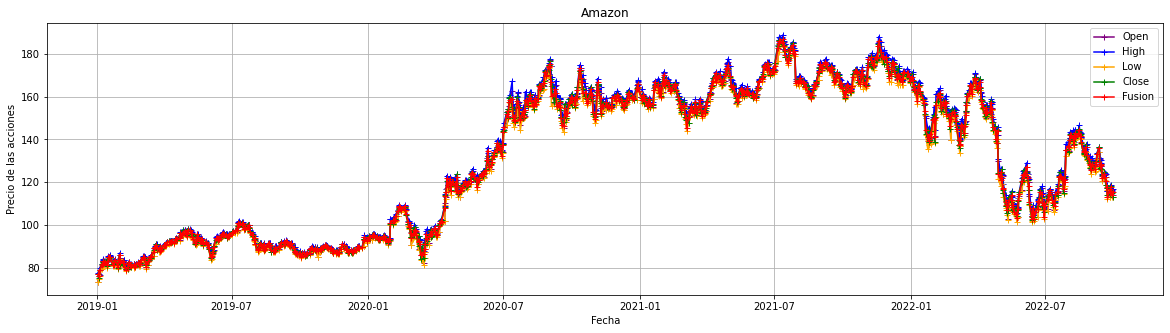

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(Fusion['Open'], color='purple', marker='+', label='Open')
plt.plot(Fusion['High'], color='blue', marker='+', label='High')
plt.plot(Fusion['Low'], color='orange', marker='+', label='Low')
plt.plot(Fusion['Close'], color='green', marker='+', label='Close')
plt.plot(Fusion['FusionLineal'], color='red', marker='+', label='Fusion')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

Se pueden estimar valores futuros. Aunque se deben separar y seleccionar datos.

Datos de visión -> variable 1-9 tiempo 1 10-19 tiempo 2 (En total 7 fusiones)
Tarea.
Tomar como Y prima los primeros valores de cara tiempo (1,11,21,31,41,51,61)